Prediction median_house_value using logistic regression

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


# Features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We are using all the columns availabe

# Data preparation

In [5]:
df.fillna(0,inplace=True)

In [6]:
df['rooms_per_household'] = df['total_rooms']/df['households']

In [7]:
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']

In [8]:
df['population_per_household'] = df['population']/df['households']

# Question 1

In [9]:
df.ocean_proximity.mode().values[0]

'<1H OCEAN'

# Split the data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=42)
df_train,df_val = train_test_split(df,test_size=0.25,random_state=42)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

df_train.reset_index(inplace=True)
df_val.reset_index(inplace=True)
df_test.reset_index(inplace=True)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 2

In [12]:
numerical = df_train.dtypes[df_train.dtypes=='float'].index

In [13]:
corr = df_train[numerical].corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924057,-0.103825,0.036997,0.061303,0.092118,0.047509,-0.016418,-0.027944,0.097318,-0.001451
latitude,-0.924057,1.000000,0.007177,-0.027330,-0.057967,-0.100419,-0.061960,-0.077450,0.109427,-0.119327,0.006698
housing_median_age,-0.103825,0.007177,1.000000,-0.361125,-0.320775,-0.291613,-0.302698,-0.120281,-0.158839,0.134313,0.016929
total_rooms,0.036997,-0.027330,-0.361125,1.000000,0.930673,0.857934,0.920322,0.196231,0.134427,-0.187596,-0.025294
total_bedrooms,0.061303,-0.057967,-0.320775,0.930673,1.000000,0.879122,0.980270,-0.010142,-0.001457,0.084422,-0.028776
population,0.092118,-0.100419,-0.291613,0.857934,0.879122,1.000000,0.907422,0.002841,-0.073628,0.035933,0.073094
households,0.047509,-0.061960,-0.302698,0.920322,0.980270,0.907422,1.000000,0.011211,-0.082918,0.065054,-0.027934
median_income,-0.016418,-0.077450,-0.120281,0.196231,-0.010142,0.002841,0.011211,1.000000,0.331317,-0.613528,0.023268
rooms_per_household,-0.027944,0.109427,-0.158839,0.134427,-0.001457,-0.073628,-0.082918,0.331317,1.000000,-0.429570,-0.004795
bedrooms_per_room,0.097318,-0.119327,0.134313,-0.187596,0.084422,0.035933,0.065054,-0.613528,-0.429570,1.000000,0.003966


Text(0.5, 1.0, 'Correlations for numerical data')

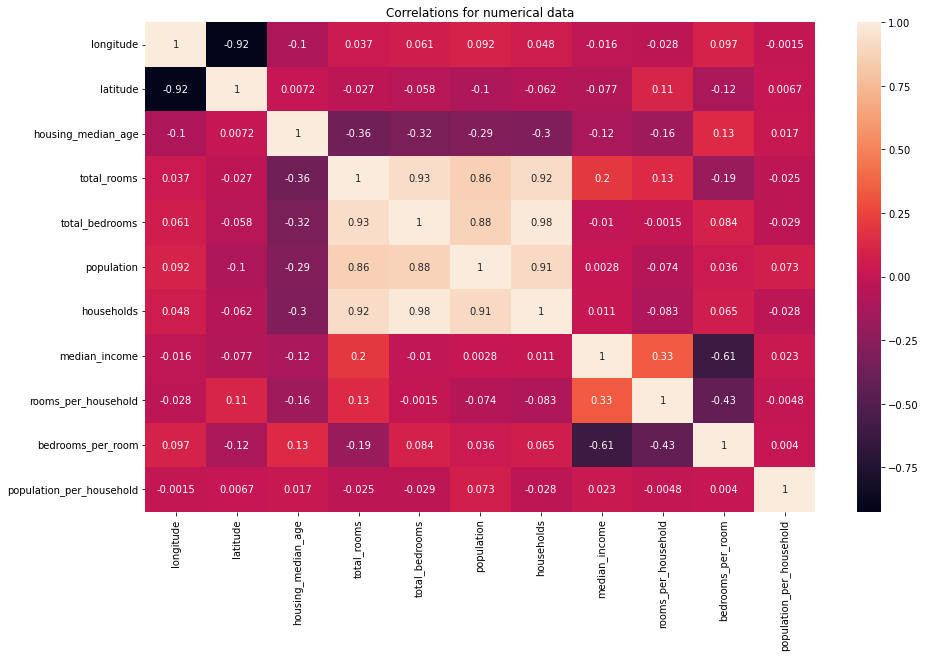

In [14]:
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr,annot=True)
plt.title('Correlations for numerical data')

The highest correlation is between households and total_bedrooms

# Make median_house_values binary

In [15]:
 above_average = (y_train.mean()<y_train).astype('int')

# Question 3

In [16]:
from sklearn.metrics import mutual_info_score

In [17]:
mutual_info_score(df_train.ocean_proximity,above_average).round(2)

0.1

The closest answer is 0.101

# Question 4

In [18]:
from sklearn.feature_extraction import DictVectorizer

In [19]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [20]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [21]:
def linear_regression(xi):
    score = w0
    for j in range(len(w)):
        score = score + xi[j]*w[j]
    result = sigmoid(score)
    return result

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train,above_average)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [24]:
y_pred = model.predict_proba(X_val)[:,1]
X_val.shape

(5160, 17)

In [25]:
above_pred = y_pred>=0.5

In [26]:
((y_train.mean()<y_val).astype('int') == above_pred.astype('int')).mean()

0.835077519379845

In [27]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] =  above_pred.astype('int')
df_pred['actual'] = ((y_train).mean()<y_val).astype('int') 
df_pred['correct'] = df_pred.prediction==df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.007493,0,0,True
1,0.016595,0,0,True
2,0.784670,1,1,True
3,0.627343,1,1,True
4,0.258221,0,1,False
...,...,...,...,...
5155,0.986504,1,1,True
5156,0.042342,0,0,True
5157,0.049973,0,0,True
5158,0.806489,1,1,True


In [28]:
acc = df_pred.correct.mean().round(2)
acc

0.84

# Question 5

In [29]:
eliminate = ['total_rooms',
'total_bedrooms',
'population',
'households']
features=['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'ocean_proximity']

In [30]:
for i in eliminate:
    feat = features.copy()
    feat.remove(i)
    train_dicts = df_train[feat].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    val_dicts = df_val[feat].to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train,above_average)
    y_pred = model.predict_proba(X_val)[:,1]
    above_predi = y_pred>=0.5
    acc_f = ((y_train.mean()<y_val).astype('int') == above_predi.astype('int')).mean()
    print(i,acc_f,acc_f-acc)

total_rooms 0.8374031007751938 -0.002596899224806215
total_bedrooms 0.835077519379845 -0.00492248062015499
population 0.818217054263566 -0.021782945736434023
households 0.8308139534883721 -0.00918604651162791


total_rooms is the feature that has the smallest difference

# Question 6

In [31]:
from sklearn.linear_model import Ridge

In [40]:
y_train

array([228500., 279900., 183000., ..., 222100., 283500., 325000.])

In [45]:
y_train_log = np.log1p(y_train)
y_train_log

array([12.33929587, 12.54219125, 12.1172469 , ..., 12.31088751,
       12.55497093, 12.69158354])

In [46]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [48]:
for i in [0, 0.01, 0.1, 1, 10]:
    train_dicts = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    val_dicts = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    model = Ridge(alpha=i)
    model.fit(X_train,y_train_log)
    y_pred = model.predict(X_val)
    print(i,rmse(np.log1p(y_val),y_pred).round(3))

C:\Users\Damian Marvel\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64486e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0 0.334
0.01 0.334
0.1 0.334
1 0.334
10 0.333


10 has the best rmse